# 요일과 고장의 연관성 분석

<br>
<br>

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
df = pd.read_csv("training_data7~12.csv")
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),생년,성별,이용자종류,대여요일,등록일시,고장구분,고장
0,SPB-50867,2022-07-01 0:15,864,순천향대학병원(한남오거리),2022-07-01 0:32,4607,국립중앙박물관 -용산가족공원 앞,16,3280.00,1992,M,내국인,Friday,2022-07-01 19:53,안장,1
1,SPB-40789,2022-07-01 0:23,5752,풍납백제문화공원 옆 인근,2022-07-01 0:31,1009,천호역4번출구(현대백화점),7,1196.21,2001,M,내국인,Friday,2022-07-01 1:08,안장,1
2,SPB-40134,2022-07-01 0:32,1339,삼성전자서비스 성북센터,2022-07-01 0:57,1306,한성대입구역2번출구,25,3409.46,1998,F,내국인,Friday,2022-07-01 0:57,페달,1
3,SPB-50932,2022-07-01 0:59,670,삼육서울병원 버스정류장,2022-07-01 1:09,628,휘봉고등학교 앞,9,1103.01,1997,M,내국인,Friday,2022-07-01 1:09,체인,1
4,SPB-55153,2022-07-01 1:00,1661,당현천근린공원,2022-07-01 1:04,1656,중앙하이츠 아파트 입구,4,852.32,1997,M,내국인,Friday,2022-07-01 8:03,기타,1


<br>

## 1. 요일에 따른 고장비율 분석

In [17]:
def 요일에_따른_분할(day):
    df_day = df[df['대여요일'] == day]
    
    df_broken = df_day[df_day['고장'] == 1]
    df_normal = df_day[df_day['고장'] == 0]
    
    print(f"'{day}'의 고장데이터 : {len(df_broken)}개 / '{day}'의 정상데이터 : {len(df_normal)}개")
    
    if len(df_broken) >= len(df_normal):
        print("고장데이터가 정상데이터에 대해 {:.2f}% 더 많습니다.".format((len(df_broken) / len(df_normal) - 1) * 100))
    else:
        print("정상데이터가 고장데이터에 대해 {:.2f}% 더 많습니다.".format((len(df_normal) / len(df_broken) - 1) * 100))
    return [len(df_broken), len(df_normal), day]

In [18]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data = []

for day in reversed(days):
    data.append(요일에_따른_분할(day))
    print()

'Saturday'의 고장데이터 : 1542개 / 'Saturday'의 정상데이터 : 1560개
정상데이터가 고장데이터에 대해 1.17% 더 많습니다.

'Friday'의 고장데이터 : 2278개 / 'Friday'의 정상데이터 : 2310개
정상데이터가 고장데이터에 대해 1.40% 더 많습니다.

'Thursday'의 고장데이터 : 2898개 / 'Thursday'의 정상데이터 : 2640개
고장데이터가 정상데이터에 대해 9.77% 더 많습니다.

'Wednesday'의 고장데이터 : 2225개 / 'Wednesday'의 정상데이터 : 2759개
정상데이터가 고장데이터에 대해 24.00% 더 많습니다.

'Tuesday'의 고장데이터 : 1960개 / 'Tuesday'의 정상데이터 : 1741개
고장데이터가 정상데이터에 대해 12.58% 더 많습니다.

'Monday'의 고장데이터 : 1396개 / 'Monday'의 정상데이터 : 1196개
고장데이터가 정상데이터에 대해 16.72% 더 많습니다.

'Sunday'의 고장데이터 : 908개 / 'Sunday'의 정상데이터 : 1001개
정상데이터가 고장데이터에 대해 10.24% 더 많습니다.



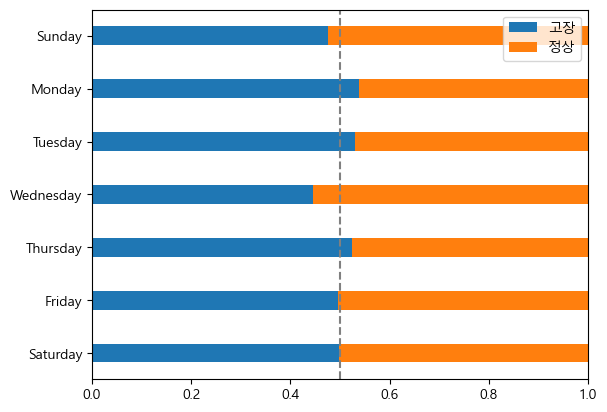

In [19]:
# 각 데이터 리스트에서 고장 수와 정상 수를 추출
values1 = [x[0] for x in data]
values2 = [x[1] for x in data]
labels = [x[2] for x in data]

# '고장 수'와 '정상 수' 합치기
total = [i + j for i, j in zip(values1, values2)]

# 비율 구하기
values1 = [x / y for x, y in zip(values1, total)]
values2 = [x / y for x, y in zip(values2, total)]
total = [1 for _ in range(len(data))]  # 모든 Total의 합이 1이 되도록 설정

# 그래프 그리기
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(data))

rects1 = ax.barh(index, values1, bar_width, label='고장')
rects2 = ax.barh(index, values2, bar_width, left=values1, label='정상')

# y-축의 눈금과 라벨을 설정
tick_locations = index
plt.yticks(tick_locations, labels)

ax.set_xlim([0, 1])  # x-축의 범위를 0~1로 지정
ax.axvline(x=0.5, linestyle='--', color='gray') # x 값이 0.5인 위치에 점선 추가
ax.legend()

plt.show()

### 분석결과

요일별로 고장정상비율을 살펴보면, 비율이 유의미하게 차이가 나는 요일이 보입니다.

**월요일, 화요일, 목요일은 고장 비율이 정상 비율에 비해 10%이상 높습니다.**

**일요일, 수요일은 정상 비율이 고장 비율에 비해 10%이상 높습니다.**

금요일, 토요일은 비율이 비슷합니다.

<br>
<br>

## 2. 주말, 평일에 따른 고장비율 분석

In [20]:
df_weekend = df[(df['대여요일'] == 'Saturday') | (df['대여요일'] == 'Sunday')]
df_weekend_broken = df_weekend[df_weekend['고장'] == 1]
df_weekend_normal = df_weekend[df_weekend['고장'] == 0]

df_weekday = df[(df['대여요일'] != 'Saturday') & (df['대여요일'] != 'Sunday')]
df_weekday_broken = df_weekday[df_weekday['고장'] == 1]
df_weekday_normal = df_weekday[df_weekday['고장'] == 0]

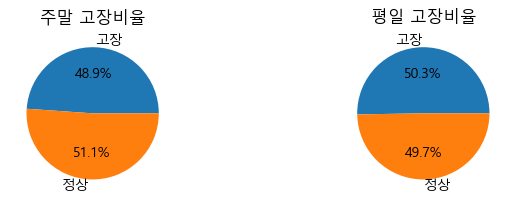

In [21]:
labels = ['고장', '정상']

fig, axs = plt.subplots(1, 2)

axs[0].pie([len(df_weekend_broken), len(df_weekend_normal)], labels=labels, autopct='%1.1f%%')
axs[0].set_aspect('equal')
axs[0].set_title('주말 고장비율')

axs[1].pie([len(df_weekday_broken), len(df_weekday_normal)], labels=labels, autopct='%1.1f%%')
axs[1].set_aspect('equal')
axs[1].set_title('평일 고장비율')

plt.subplots_adjust(wspace=1)

plt.show()

### 분석결과

주말, 평일에 따른 고장비율은 유의미한 차이를 얻지 못했습니다.

<br>

## 해석

분석하기 전에는, 주말과 평일에 따라 유의미한 분석결과를 얻을 수 있을 것이라고 예상했습니다.

하지만, 요일에 따른 고장비율은 생각보다 편차가 있었습니다.

**특히, 수요일은 정상 비율이 고장 비율에 비해 24%나 높은데, 어떤 이유인지 추측하기 어렵습니다.**

이유를 알기 위해서는 각 요일별 특징들을 깊게 알아봐야 할 것 같습니다.